In [1]:
# Import data from file into dataframe
import pandas as pd
import io
df = pd.read_csv('autoMPG.csv', names=["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin", "Car Name"])
# Dataset is now stored in a Pandas Dataframe
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [2]:
df.shape

(398, 9)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [4]:
# Drop Car Name since it is not useful and contains
df.drop("Car Name", axis=1, inplace=True)

In [5]:
# Remove all 6 rows missing values for horsepower (marked as "?" in the daatset)
import numpy as np
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    object 
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


In [7]:
# Make Horsepower of type int64
df['Horsepower'] = pd.to_numeric(df['Horsepower'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    int64  
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6 KB


In [9]:
# Reset index column after dropping rows and show info() to confirm that the changes have been applied
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    int64  
 4   Weight        392 non-null    int64  
 5   Acceleration  392 non-null    float64
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 24.6 KB


In [10]:
df.shape

(392, 8)

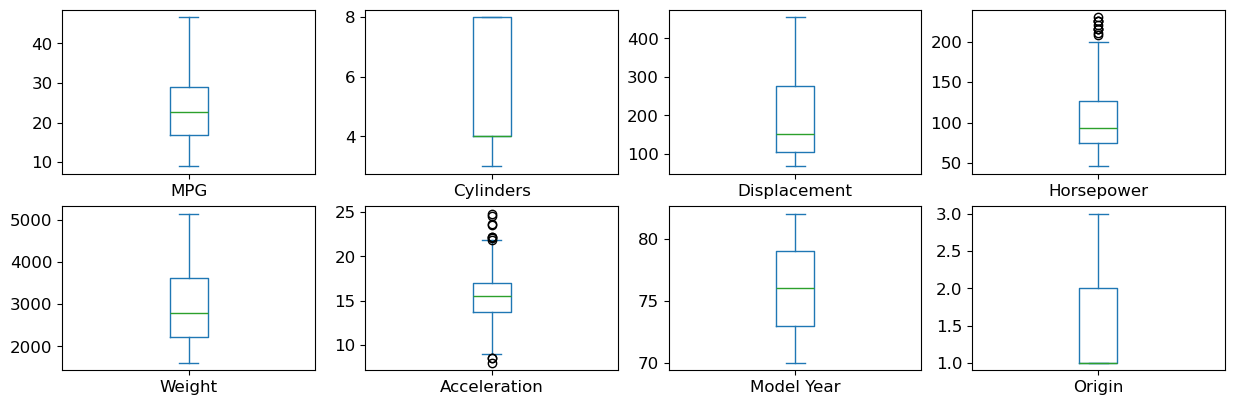

In [11]:
df.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20));

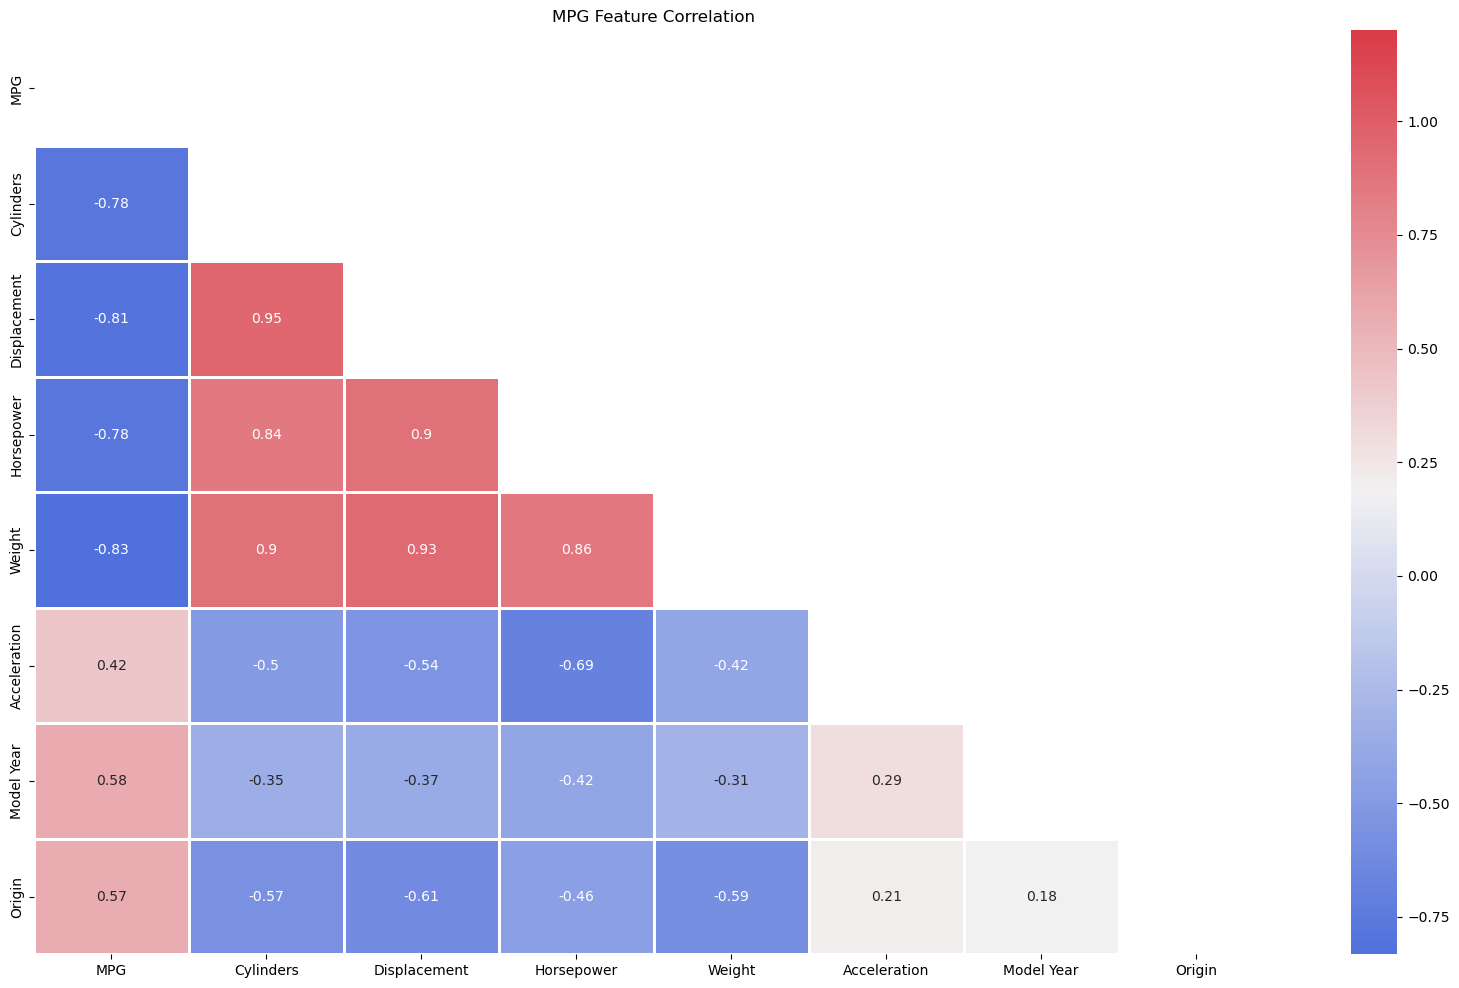

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# Correlation matrix
corrMatt = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('MPG Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,ax=ax, annot=True, fmt='.2g', linewidths=1);

In [13]:
# Normalize values for 'Cylinders' and 'Model Year'

df['Cylinders'] = df['Cylinders'].replace([3,4,6,8], [0,1,2,3])
df['Model Year'] = df['Model Year'].replace([70,71,72,73,74,75,76,77,78,79,80,81,82], [0,1,2,3,4,5,6,7,8,9,10,11,12])

In [14]:
# Split the dataframe into features and output
y = df.iloc[:, :1]
# Get the shape of the dataframe and select everything except the output feature
num_cols = df.shape[1]
Xs = df.iloc[:, 1:]
Xs.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,3,307.0,130,3504,12.0,0,1
1,3,350.0,165,3693,11.5,0,1
2,3,318.0,150,3436,11.0,0,1
3,3,304.0,150,3433,12.0,0,1
4,3,302.0,140,3449,10.5,0,1


In [15]:
y

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
387,27.0
388,44.0
389,32.0
390,28.0


In [16]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,1.757653,194.411990,104.469388,2977.584184,15.541327,5.979592,1.576531
std,7.805007,0.907453,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,0.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,1.000000
25%,17.000000,1.000000,105.000000,75.000000,2225.250000,13.775000,3.000000,1.000000
50%,22.750000,1.000000,151.000000,93.500000,2803.500000,15.500000,6.000000,1.000000
75%,29.000000,3.000000,275.750000,126.000000,3614.750000,17.025000,9.000000,2.000000
max,46.600000,5.000000,455.000000,230.000000,5140.000000,24.800000,12.000000,3.000000


In [17]:
# LASSO

from sklearn.svm import LinearSVC
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

ls = Lasso(alpha = 0.6).fit(Xs, y)
model = SelectFromModel(ls, prefit=True)

feature_idx = model.get_support()
feature_name = Xs.columns[feature_idx]

X_new = model.transform(Xs)
FS_df = pd.DataFrame(X_new, columns=feature_name) # 4 features retained
FS_df.shape
FS_df.head()

/Users/ronak/anaconda3/envs/MLE/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


,Displacement,Horsepower,Weight,Model Year
0,307.0,130.0,3504.0,0.0
1,350.0,165.0,3693.0,0.0
2,318.0,150.0,3436.0,0.0
3,304.0,150.0,3433.0,0.0
4,302.0,140.0,3449.0,0.0


In [18]:
FS_df['MPG'] = df['MPG'] # Add output back to the dataframe
FS_df.head()

,Displacement,Horsepower,Weight,Model Year,MPG
0,307.0,130.0,3504.0,0.0,18.0
1,350.0,165.0,3693.0,0.0,15.0
2,318.0,150.0,3436.0,0.0,18.0
3,304.0,150.0,3433.0,0.0,16.0
4,302.0,140.0,3449.0,0.0,17.0


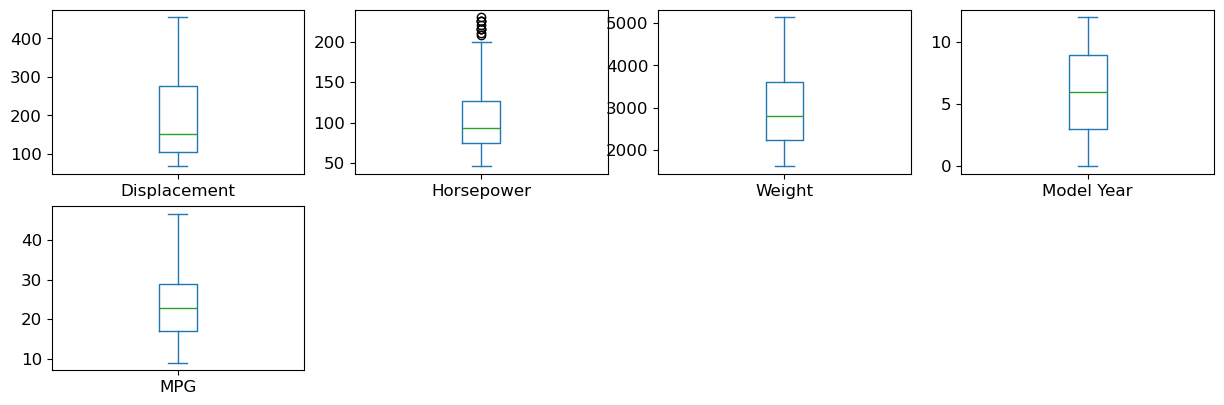

In [19]:
data_mean = FS_df.iloc[:, :] # Boxplots to show the spread of values in their own respect
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20));

<Axes: >

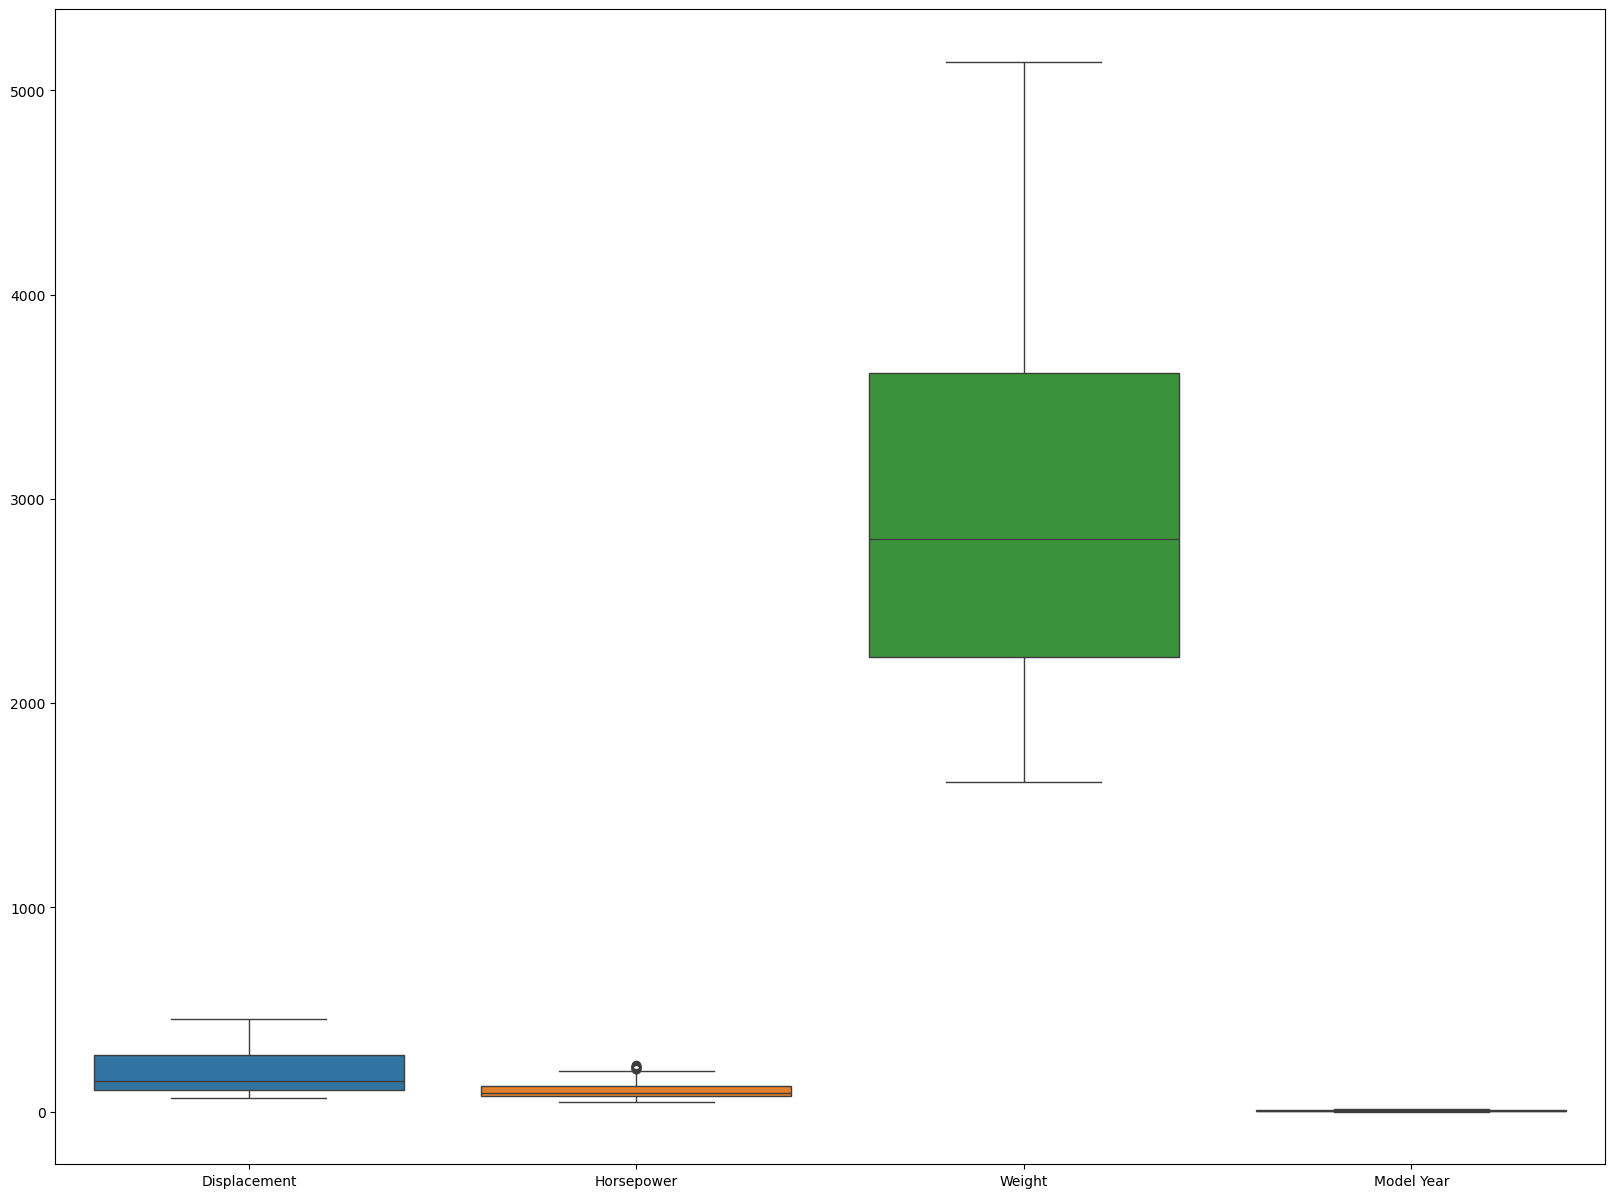

In [20]:
fig,ax=plt.subplots(1,figsize=(20,15)) # Boxplots to show the spread of values with respect to one another
sns.boxplot(data=FS_df.iloc[:, 0:4],ax=ax)

In [21]:
# Normalization is needed, use StandardScaler

pre_scalar = FS_df.drop('MPG', axis=1)
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Fit the scaler to the data and transform it
scaled_features = scaler.fit_transform(pre_scalar.values)

# Create a new dataframe with the scaled values and the same column names and index as the original
scaled_df = pd.DataFrame(scaled_features, index=FS_df.index, columns=pre_scalar.columns)

scaled_df.head()  # Display the first few rows of the standardized dataframe

df = scaled_df
df['MPG'] = FS_df['MPG']

<Axes: >

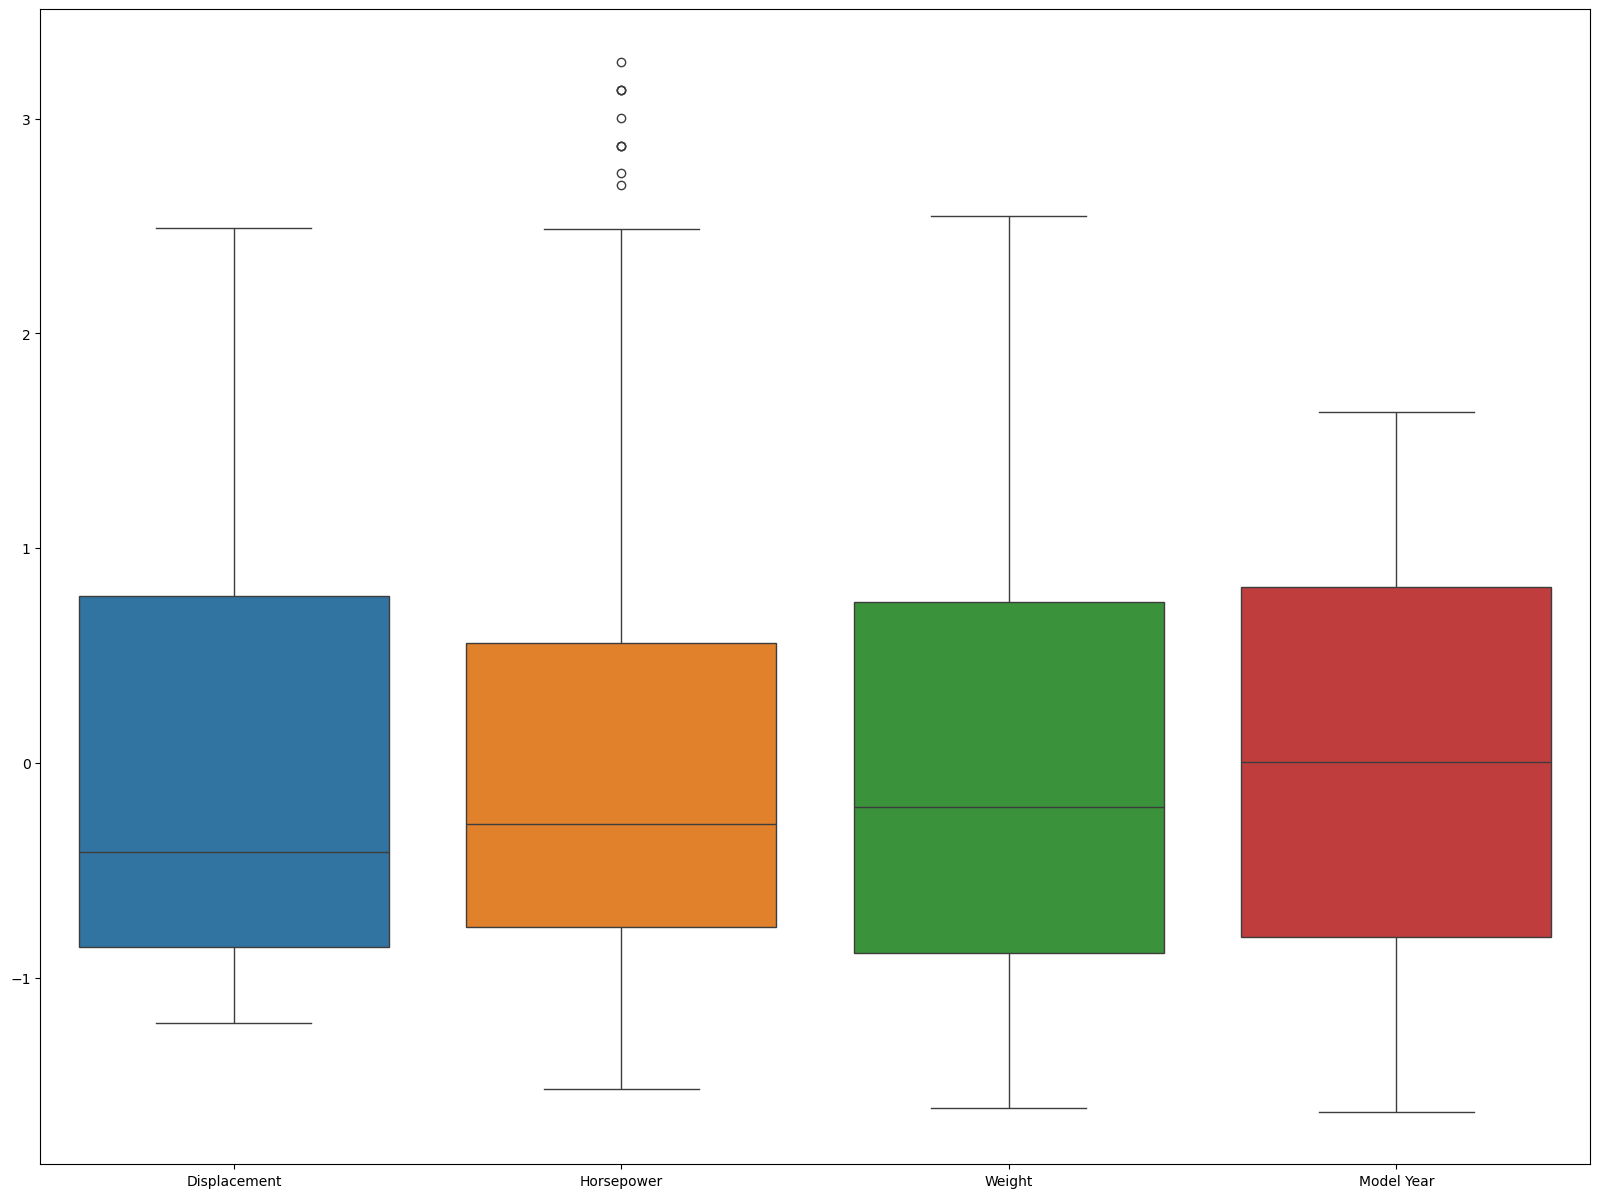

In [22]:
fig,ax=plt.subplots(1,figsize=(20,15)) # Boxplots to ensure the input values are distributed in similar ranges
sns.boxplot(data=df.iloc[:, 0:4],ax=ax)

In [23]:
# Shuffle the dataframe so that the folds each have random distribution
shuffled_df = scaled_df.sample(frac=1, random_state=967).reset_index(drop=True)

# Separation of input features and the output into X and y
X = shuffled_df.drop('MPG', axis=1)
y = shuffled_df['MPG']

#### Linear Regression

Mean squared errors per fold:  [9.187749625854366, 12.66376327012053, 14.72703634137994, 12.092369044000119, 10.369663199159165]
Average Mean Squared error:  11.808116296102824
Variance of k-fold MSEs: 3.653698880


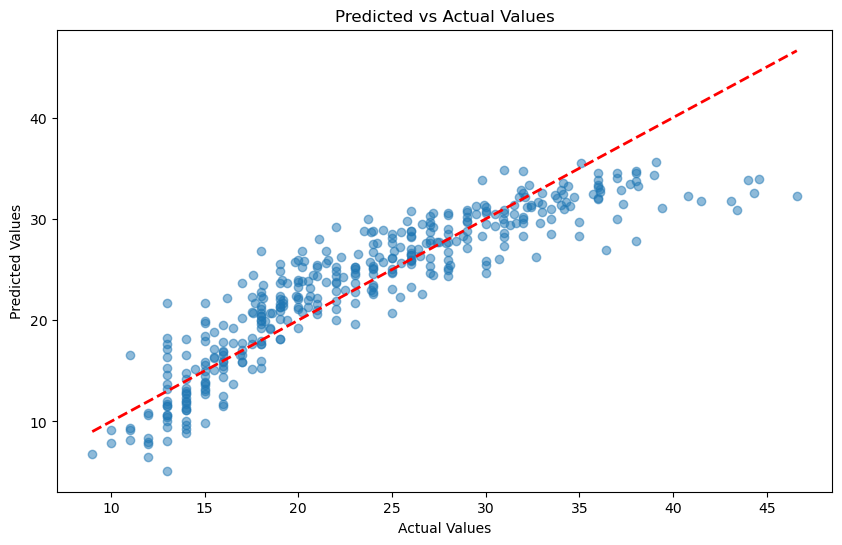

In [24]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd


# KFold cross-validation setup
kf = KFold(n_splits=5)
mses = []
predictions = []
actuals = []
train_scores = []
test_scores = []

# Cross-validation loop
for train_index, test_index in kf.split(X, y):
    # Split data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    train_scores.append(regressor.score(X_train, y_train))
    test_scores.append(regressor.score(X_test, y_test))

    # Make predictions and calculate MSE
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

    # Store the actual and predicted values for plotting
    predictions.extend(y_pred)
    actuals.extend(y_test)


# Calculate average MSE
average_mse = np.mean(mses)
variance_mse = np.var(mses)

print("Mean squared errors per fold: ", mses)
print("Average Mean Squared error: ", average_mse)
print(f"Variance of k-fold MSEs: {variance_mse:0.9f}")

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', lw=2)  # Plot a line y = x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

#### Support Vector Machine

Fold MSE: 7.986
Best C for this fold: 5

Fold MSE: 7.203
Best C for this fold: 20

Fold MSE: 7.625
Best C for this fold: 20

Fold MSE: 10.371
Best C for this fold: 20

Fold MSE: 6.276
Best C for this fold: 5

Average MSE across folds: 7.892
Variance of k-fold MSEs: 1.861574043


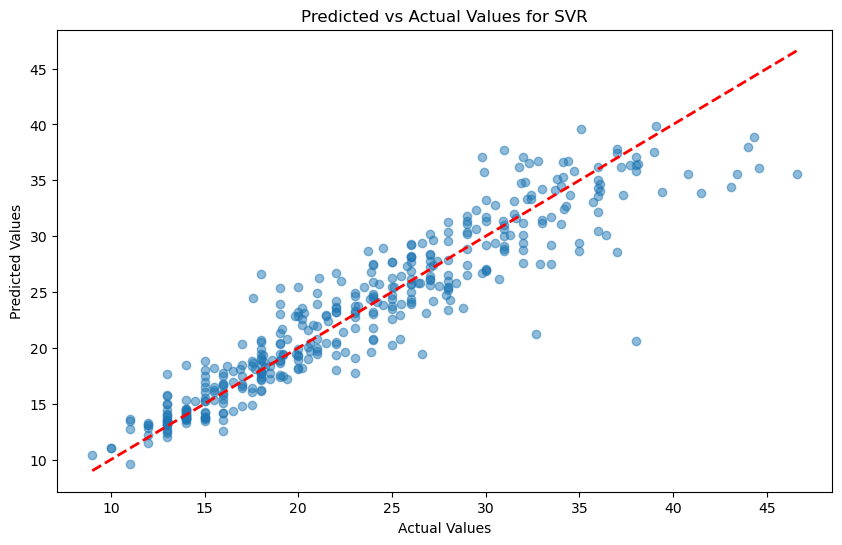

In [33]:
# Parameter tuning using grid search

from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set up the range of hyperparameter C values to test
param_grid = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 3.0, 5, 10, 20, 50, 100, 1000]}

# Initialize the SVR model
svr = SVR()

# Set up inner cross-validation for hyperparameter tuning
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Set up outer cross-validation to evaluate the model
outer_cv = KFold(n_splits=5)

# Arrays to store scores and predictions
mse_scores = []
all_predictions = []
all_actuals = []
fold_counter = 1;

for train_index, test_index in outer_cv.split(X):
    # Split data into training and test sets for the current CV fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Run inner cross-validation to find the best hyperparameter C
    grid_search.fit(X_train, y_train)

    # Use the best estimator
    best_svr = grid_search.best_estimator_
    

    # Predict using the best estimator and store for plotting
    y_pred = best_svr.predict(X_test)
    all_predictions.extend(y_pred)
    all_actuals.extend(y_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

    print(f"Fold MSE: {mse:.3f}")
    print(f"Best C for this fold: {grid_search.best_params_['C']}\n")

# Calculate average MSE across all outer folds
average_mse = np.mean(mse_scores)
variance_mse = np.var(mse_scores)
print(f"Average MSE across folds: {average_mse:0.3f}")
print(f"Variance of k-fold MSEs: {variance_mse:0.9f}")

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(all_actuals, all_predictions, alpha=0.5)
plt.plot([min(all_actuals), max(all_actuals)], [min(all_actuals), max(all_actuals)], 'r--', lw=2)  # Plot a line y = x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for SVR')
plt.show()

MSEs:  [7.8165271908631375, 7.203476131247284, 7.625320022839046, 10.370698054217172, 6.370017757342203]
Mean k-fold MSE: 7.877207831
Variance of k-fold MSEs: 1.802031885


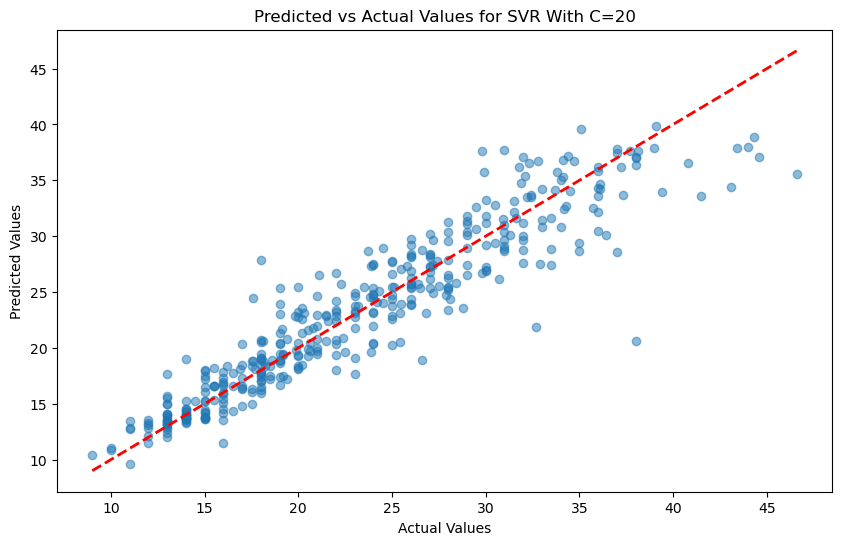

In [26]:
# Building SVR model with best hyper parameter settings

from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

mses = []
predictions = []
actuals = []

# Best C is 20 from previous tuning using grid search
best_C = 20

# Initialize the Support Vector Regressor with the best parameters
svr_best = SVR(C=best_C)

# Set up k-fold cross-validation
kf = KFold(n_splits=5)

# Cross-validation loop
for train_index, test_index in kf.split(X, y):
    # Split data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    svr_best.fit(X_train, y_train)

    # Make predictions and calculate MSE
    y_pred = svr_best.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

    # Store the actual and predicted values for plotting
    predictions.extend(y_pred)
    actuals.extend(y_test)

# Calculate mean accuracy and variance
mean_mse = np.mean(mses)
variance_mse = np.var(mses)

# Print the results
print("MSEs: ", mses)
print(f"Mean k-fold MSE: {mean_mse:0.9f}")
print(f"Variance of k-fold MSEs: {variance_mse:0.9f}")

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', lw=2)  # Plot a line y = x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for SVR With C=20')
plt.show()

#### Decision Tree Regressor

In [36]:
# Hyper parameter tuning using grid search

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the range of max_depths to be considered
max_depths = list(range(5, 20))

# Define the parameter grid for the grid search
param_grid = {'max_depth': max_depths}

# Define the K-Fold cross-validator
kf = KFold(n_splits=5)

# Define the Decision Tree Regressor
tree = DecisionTreeRegressor()

# Initialize lists to store results
fold_results = []

# Perform K-Fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(X)):
    # Split the data into training and test sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Define the grid search with MSE as the scoring function
    grid_search = GridSearchCV(tree, param_grid, cv=kf, scoring=make_scorer(mean_squared_error))

    # Fit the grid search to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_

    # Calculate the MSE and variance on the training set used in the grid search
    train_mse = grid_search.best_score_
    train_variance = np.var([mean_squared_error(y_train, best_model.predict(X_train)) for train_index, _ in kf.split(X_train)])

    # Evaluate the model on the test set
    test_mse = mean_squared_error(y_test, best_model.predict(X_test))
    test_variance = np.var([mean_squared_error(y_test, best_model.predict(X_test)) for _, test_index in kf.split(X_test)])
    
    # Store the results for this fold
    fold_results.append({
        'fold': fold + 1,
        'train_mse': train_mse,
        'train_variance': train_variance,
        'test_mse': test_mse,
        'test_variance': test_variance,
        'best_max_depth': best_model.get_params()['max_depth']
    })

# After the loop, fold_results will contain all the information needed
fold_results

[{'fold': 1,
  'train_mse': 13.15281484283867,
  'train_variance': 3.0814879110195774e-33,
  'test_mse': 15.682299575788814,
  'test_variance': 0.0,
  'best_max_depth': 10},
 {'fold': 2,
  'train_mse': 15.951506272401435,
  'train_variance': 4.81482486096809e-35,
  'test_mse': 14.479873417721517,
  'test_variance': 0.0,
  'best_max_depth': 14},
 {'fold': 3,
  'train_mse': 14.486550435227855,
  'train_variance': 0.0,
  'test_mse': 7.448205128205129,
  'test_variance': 0.0,
  'best_max_depth': 18},
 {'fold': 4,
  'train_mse': 15.223254487253168,
  'train_variance': 0.0,
  'test_mse': 11.709358974358976,
  'test_variance': 0.0,
  'best_max_depth': 12},
 {'fold': 5,
  'train_mse': 15.28535336937511,
  'train_variance': 3.0814879110195774e-33,
  'test_mse': 10.988045868945871,
  'test_variance': 0.0,
  'best_max_depth': 10}]

MSEs:  [5.4120357613501, 5.6104075516502485, 5.790154411087105, 8.62173593471562, 6.370017757342203]
Mean k-fold MSE: 6.360870283
Variance of k-fold MSEs: 1.380159008


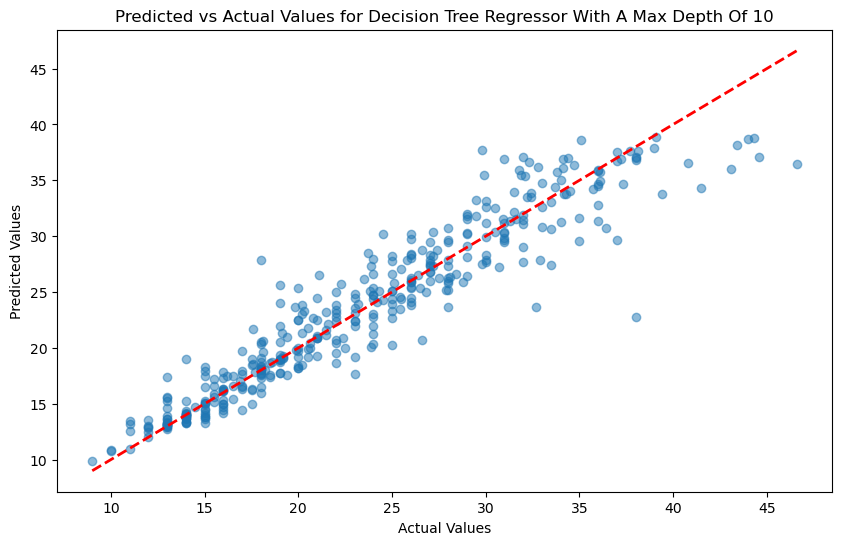

In [38]:
# Building Decision Tree model with best hyper parameter settings

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

mses = []
predictions = []
actuals = []

# Best max_depth is 10 from previous tuning using grid search
best_max_depth = 10

# Initialize the Decision Tree Regressor with the best parameters
tree_best = DecisionTreeRegressor(max_depth = best_max_depth)

# Set up k-fold cross-validation
kf = KFold(n_splits=5)

# Cross-validation loop
for train_index, test_index in kf.split(X, y):
    # Split data into training and test sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model
    tree_best.fit(X_train, y_train)

    # Make predictions and calculate MSE
    y_pred = svr_best.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

    # Store the actual and predicted values for plotting
    predictions.extend(y_pred)
    actuals.extend(y_test)

# Calculate mean accuracy and variance
mean_mse = np.mean(mses)
variance_mse = np.var(mses)

# Print the results
print("MSEs: ", mses)
print(f"Mean k-fold MSE: {mean_mse:0.9f}")
print(f"Variance of k-fold MSEs: {variance_mse:0.9f}")

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', lw=2)  # Plot a line y = x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for Decision Tree Regressor With A Max Depth Of 10')
plt.show()

#### Artificial Neural Networks (MLP Regressor)

Mean squared errors per fold:  [7.471530201639773, 7.422949670384341, 7.764165504820048, 9.190008968017807, 5.6533992501094]
Average Mean Squared error:  7.500410718994274
Variance of k-fold MSEs: 1.245820438


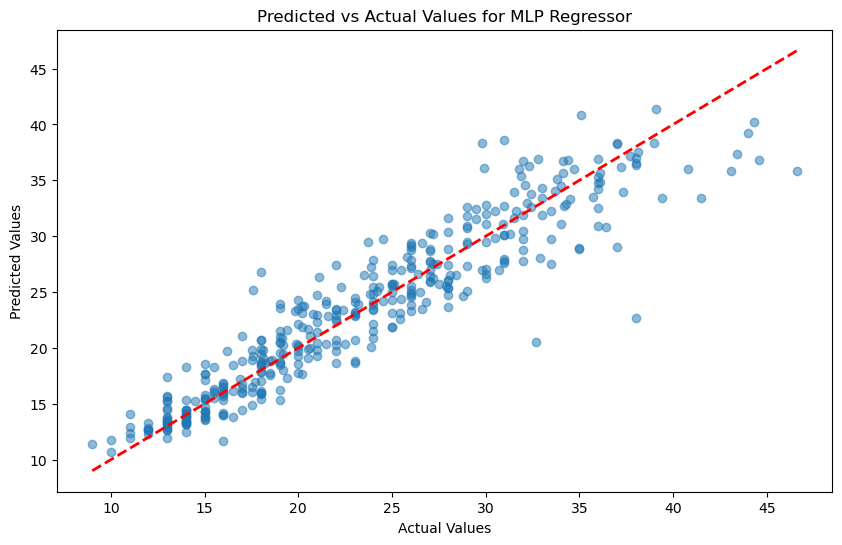

In [29]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the MLP Regressor
# We found that hidden layer sizes of (50,) works best through trial and error
mlp_regressor = MLPRegressor(max_iter=10000, hidden_layer_sizes = (50,), random_state=0)

kf = KFold(n_splits=5)

# Arrays to store actual and predicted values
actuals = []
predictions = []
mses = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the model with the best parameters
    mlp_regressor.fit(X_train, y_train)
    y_pred = mlp_regressor.predict(X_test)

    # Store actual and predicted values
    actuals.extend(y_test)
    predictions.extend(y_pred)
    
    mse = mean_squared_error(y_test, y_pred)
    mses.append(mse)

# Calculate mean MSE across all folds
average_mse = np.mean(mses)
variance_mse = np.var(mse_scores)
print("Mean squared errors per fold: ", mses)
print("Average Mean Squared error: ", average_mse)
print(f"Variance of k-fold MSEs: {variance_mse:0.9f}")

# Plotting Predicted vs Actual
plt.figure(figsize=(10, 6))
plt.scatter(actuals, predictions, alpha=0.5)
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], 'r--', lw=2)  # Plot a line y = x
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values for MLP Regressor')
plt.show()